In [ ]:
import numpy as np
import pandas as pd

salary_data = pd.read_csv('/content/all_salary_data.csv', encoding='latin1')
stats_data = pd.read_csv('/content/2010-2024_average(3).csv', encoding='latin1')
# 각 선수의 데이터를 추가할 열을 미리 정의
new_columns = ['Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
               'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

# 새로운 열을 미리 추가하고, 초기값은 None으로 설정
for col in new_columns:
    salary_data[col] = None

# 모든 행에 대해 데이터 처리
for idx, row in salary_data.iterrows():
    player_name = row['name']
    start_year = row['start']

    # start_year 이전 3년치 데이터 필터링
    filtered_stats = stats_data[(stats_data['name'] == player_name) &
                                (stats_data['year'].between(start_year-1, start_year))]

    if not filtered_stats.empty:
        # Pos 열 값 추가 (가장 위의 행에서 가져옴)
        salary_data.at[idx, 'Pos'] = filtered_stats.iloc[0]['Pos']
        filtered_stats.drop(columns=['Pos'], inplace=True, errors='ignore')

        # 나머지 열 값들 평균 계산 후 추가
        for col in new_columns[1:]:
            if col in filtered_stats.columns:
                salary_data.at[idx, col] = filtered_stats[col].astype(float).mean()
            else:
                salary_data.at[idx, col] = None
salary_data=salary_data.dropna()
# 업데이트된 데이터 저장
salary_data.to_csv('/content/final_nba_data(2).csv', index=False)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
<ipython-input-64-ddf08275245a>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_stats.drop(columns=['Pos'], inplace=True, errors='ignore')
<ipython-input-64-ddf08275245a>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_stats.drop(columns=['Pos'], inplace=True, errors='ignore')
<ipython-input-64-ddf08275245a>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_stats.drop(c

In [ ]:
cd ..

/


In [ ]:

#일단 1년치로 예측하는코드 포지션별로 다르게

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
# Load the combined dataset
data = pd.read_csv('/content/final_nba_data(2).csv')

# 포지션으로 필터링
guards = data[data['Pos'].isin(['PG', 'SG'])]
print(guards.shape)
forwards = data[data['Pos'].isin(['SF', 'PF'])]
print(forwards.shape)
centers = data[data['Pos'] == 'C']
print(centers.shape)

#각 포지션별 피쳐 선택
guard_features = ['AST', 'PTS', '3P%', 'FT%', 'STL', 'TOV', 'MP', 'G']

forward_features = ['PTS', 'TRB', 'AST', '3P%', 'FG%', 'STL', 'BLK', 'MP']


center_features = ['TRB', 'BLK', 'PTS', 'FG%', 'AST', 'MP', 'G', 'FT%']


def train_and_evaluate_model(data, features):
    X = data[features]
    y = data['target']


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)



    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')

    return model, X_test, y_test

# Train and evaluate models for each position
print("Guard Model")
guard_model, guard_X_test, guard_y_test = train_and_evaluate_model(guards, guard_features)

print("\nForward Model")
forward_model, forward_X_test, forward_y_test = train_and_evaluate_model(forwards, forward_features)

print("\nCenter Model")
center_model, center_X_test, center_y_test = train_and_evaluate_model(centers, center_features)

import matplotlib.pyplot as plt
import seaborn as sns

def visualize_results(model, X_test, y_test, title):
    y_pred = model.predict(X_test)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
    plt.xlabel('Actual Salaries')
    plt.ylabel('Predicted Salaries')
    plt.title(f'Actual vs Predicted Salaries for {title}')
    plt.show()





(1121, 33)
(920, 33)
(440, 33)
Guard Model
Mean Squared Error: 0.00237795511478513
R^2 Score: 0.5992458347216676

Forward Model
Mean Squared Error: 0.0027648486332680073
R^2 Score: 0.449800486576202

Center Model
Mean Squared Error: 0.0039006009084851506
R^2 Score: 0.357716834703075


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/final_nba_data.csv',encoding='ISO-8859-1')
data= data.dropna()
data.to_csv('/content/final_nba_data(2).csv', index=False)

           name debut  start   end     salary  birth    target Pos  \
0   A.J. Lawson  2021   2023  2026  1978006.0   2000  0.013971  SG   
1  Aaron Brooks  2007   2015  2015  2250000.0   1985  0.032143  PG   
2  Aaron Brooks  2007   2016  2016  2700000.0   1985  0.028680  PG   
3  Aaron Brooks  2007   2017  2017  2116955.0   1985  0.021363  PG   
4  Aaron Brooks  2007   2014  2014  1145685.0   1985  0.018167  PG   

            G         GS  ...       ORB       DRB       TRB       AST  \
0   51.000000   0.000000  ...  0.361389  0.970833  1.332222  0.214306   
1  110.666667  16.031971  ...  0.409023  1.395226  1.806451  2.857377   
2   98.333333   9.805556  ...  0.430093  1.373843  1.803935  3.004861   
3   72.000000   7.000000  ...  0.333333  1.200000  1.533333  2.566667   
4  125.000000  13.547956  ...  0.413535  1.292839  1.709676  2.686065   

        STL       BLK       TOV        PF       PTS  age  
0  0.126806  0.029167  0.224444  0.648750  3.580139   23  
1  0.659133  0.194449 

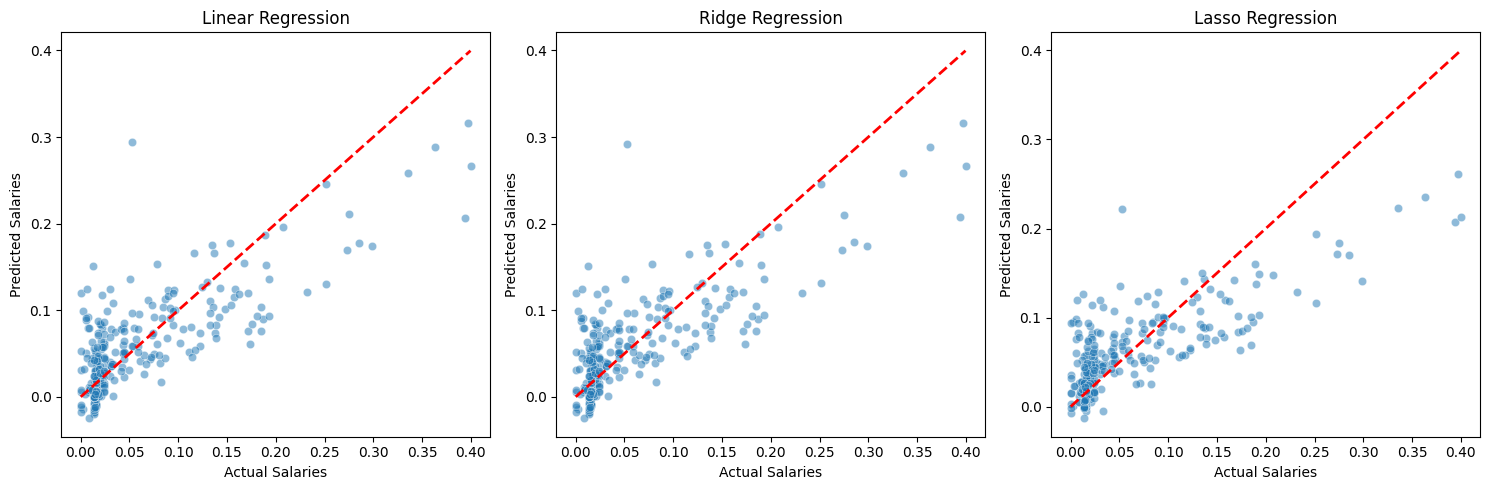

In [7]:

#ridge regression , lasso regression 모두 해보기
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/cleaned_nba_data.csv')
data= data.dropna()

# Display the first few rows of the dataset to check the data
print(data.head())

# Select key features
selected_features = ['PTS', 'MP', 'FG%', 'AST', 'TRB', '3P%', 'BLK', 'FG']

# Define X and y
X = data[selected_features]
y = data['target']

# Handle missing values
X = X.dropna()
y = y.loc[X.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Make predictions with Linear Regression
y_pred_linear = linear_model.predict(X_test_scaled)

# Initialize and train the Ridge regression model
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train_scaled, y_train)

# Make predictions with Ridge Regression
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Initialize and train the Lasso regression model
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_scaled, y_train)

# Make predictions with Lasso Regression
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Calculate evaluation metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Linear Regression - Mean Squared Error: {mse_linear}, R^2 Score: {r2_linear}')
print(f'Ridge Regression - Mean Squared Error: {mse_ridge}, R^2 Score: {r2_ridge}')
print(f'Lasso Regression - Mean Squared Error: {mse_lasso}, R^2 Score: {r2_lasso}')

# Visualize the results
plt.figure(figsize=(15, 5))

# Linear Regression Plot
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred_linear, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.title('Linear Regression')

# Ridge Regression Plot
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=y_pred_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.title('Ridge Regression')

# Lasso Regression Plot
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test, y=y_pred_lasso, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.title('Lasso Regression')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Ridge
ridge_params = {'alpha': np.logspace(-4, 4, 50)}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train_scaled, y_train)

# Define the parameter grid for Lasso
lasso_params = {'alpha': np.logspace(-4, 4, 50)}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train_scaled, y_train)

# Best parameters
best_ridge_alpha = ridge_grid.best_params_['alpha']
best_lasso_alpha = lasso_grid.best_params_['alpha']
print(f'Best Ridge alpha: {best_ridge_alpha}')
print(f'Best Lasso alpha: {best_lasso_alpha}')

# Train the models with the best parameters
ridge_model = Ridge(alpha=best_ridge_alpha)
ridge_model.fit(X_train_scaled, y_train)

lasso_model = Lasso(alpha=best_lasso_alpha)
lasso_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test_scaled)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Calculate evaluation metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Ridge Regression - Mean Squared Error: {mse_ridge}, R^2 Score: {r2_ridge}')
print(f'Lasso Regression - Mean Squared Error: {mse_lasso}, R^2 Score: {r2_lasso}')

Best Ridge alpha: 1.2067926406393288
Best Lasso alpha: 0.0001
Ridge Regression - Mean Squared Error: 0.003121251753266053, R^2 Score: 0.48035583332670184
Lasso Regression - Mean Squared Error: 0.0031175620477639915, R^2 Score: 0.48097011698353354


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Linear Regression - Mean Squared Error: 0.0018098341132758203, R^2 Score: 0.6839519185758485
Ridge Regression - Mean Squared Error: 0.001786151451113434, R^2 Score: 0.6880875793441665
Lasso Regression - Mean Squared Error: 0.0020321111859439894, R^2 Score: 0.6451360725013164


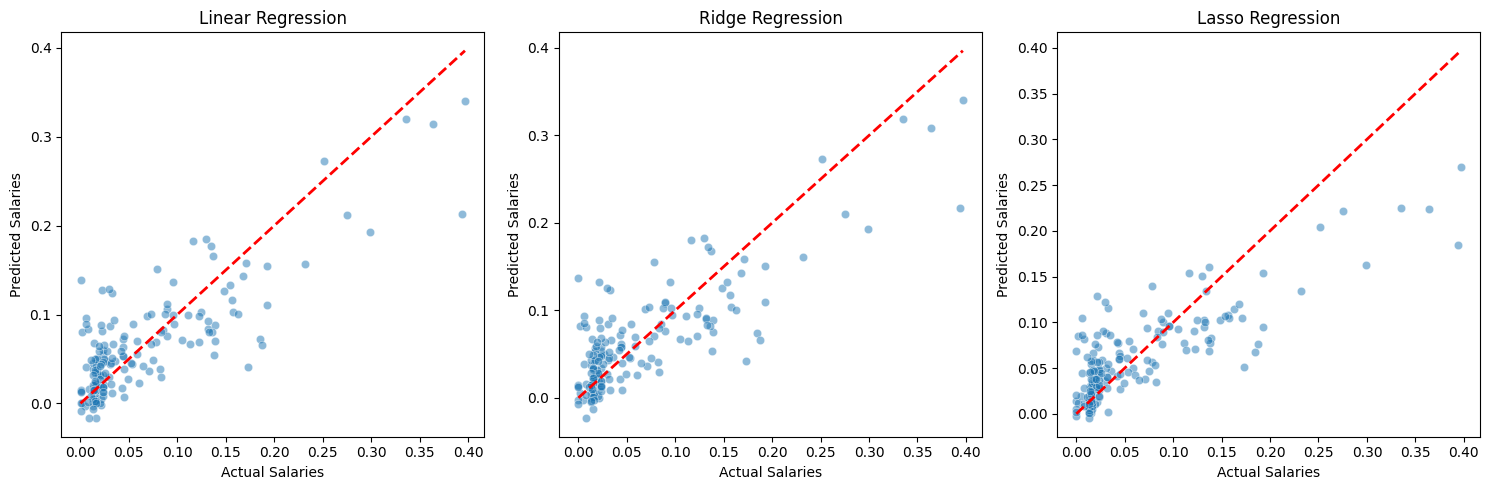

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load and handle missing values
data = pd.read_csv('/content/cleaned_nba_data.csv')
data = data.dropna()

# One-hot encode the 'Pos' column
encoder = OneHotEncoder(sparse=False)
encoded_positions = encoder.fit_transform(data[['Pos']])
encoded_df = pd.DataFrame(encoded_positions, columns=encoder.get_feature_names_out(['Pos']))
encoded_df.to_csv('/content/encoded_positions.csv', index=False)

# Concatenate the original dataframe with the encoded positions
data = pd.concat([data, encoded_df], axis=1)

# Select key features and include encoded position columns
selected_features = ['GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
               'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF','PTS'] + list(encoder.get_feature_names_out(['Pos']))

# Define X and y
X = data[selected_features]
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Make predictions with Linear Regression
y_pred_linear = linear_model.predict(X_test_scaled)

# Initialize and train the Ridge regression model
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train_scaled, y_train)

# Make predictions with Ridge Regression
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Initialize and train the Lasso regression model
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_scaled, y_train)

# Make predictions with Lasso Regression
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Calculate evaluation metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Linear Regression - Mean Squared Error: {mse_linear}, R^2 Score: {r2_linear}')
print(f'Ridge Regression - Mean Squared Error: {mse_ridge}, R^2 Score: {r2_ridge}')
print(f'Lasso Regression - Mean Squared Error: {mse_lasso}, R^2 Score: {r2_lasso}')

# Visualize the results
plt.figure(figsize=(15, 5))

# Linear Regression Plot
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred_linear, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.title('Linear Regression')

# Ridge Regression Plot
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=y_pred_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.title('Ridge Regression')

# Lasso Regression Plot
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test, y=y_pred_lasso, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.title('Lasso Regression')

plt.tight_layout()
plt.show()
